# Non parametric tests

Please ensure you have watched the Chapter 5 video(s).

## You will learn the following things in this Chapter

- When to use a non parametric test on your data.
- How to calculate the Kendall's rank correlation.
- Understand how to use Spearman's rank to derive correlations.
- Understand when to use a Kilmogorov Smirnov test to compare distributions.
- How to use Python programming to do the above.
- After completing this notebook you will be able to finish CA 1 question 5.

***

A non parametric test (sometimes called a distribution free test) does not assume anything about the underlying distribution (for example, that the data comes from a normal distribution). Non-parametric tests are important particularly if the sample size is small or if there are large outliers in the data.  

Here we review some of the more common examples of non-parametric tests: (i) the univariate tests Kolmogorov-Smirnov and Anderson Darling and (ii) bivariate tests Kendall's $\tau$ and the Spearman's $\rho_s$ rank.

## Spearman's rank

As we saw in Chapter 4, correlation is a measure of how much two variables are related. This means that as one variable increases, so do the values of the other variable, or perhaps the other variable decreases as one increases.  This is simple to estimate if both variables have a Guassian distribution, but if we do not know if this is the case, we need to use non parametric methods.

Spearman's rank correlation coefficient can be defined as a special case of the Pearson $r$ applied to ranked (sorted) variables. Unlike Pearson, Spearman's correlation is not restricted to linear relationships. Instead, it measures monotonic association (only strictly increasing or decreasing, but not mixed) between two variables and relies on the rank order of values. In other words, rather than comparing means and variances, Spearman's coefficient looks at the relative order of values for each variable. This makes it appropriate to use with both *continuous and discrete* data.

This test is named after Charles Spearman and is denoted by greek letter $\rho$.  Spearman's rank correlation is given by:

$\rho_s = \dfrac{\sum_{i = 1}^N  \,R(x_i)\,R(y_i) - N(N + 1)^2/4} {\sqrt{\sum_{i = 1}^N  \,R(x_i)^2 - N(N + 1)^2/4} \sqrt{\sum_{i = 1}^N  \,R(y_i)^2 - N(N + 1)^2/4}}$

In the case of no ties (i.e. duplicates of x, y, etc), the above expression reduces to 

$\rho_s = 1 - \dfrac{\sum_{i = 1}^N \, [R(x_i) -R(y_i)]^2 }{N\,(N^2 - 1) }
.$

As you can possibly see from the equations above, Spearman's $\rho$ is effectively calculating Pearson $r$ correlation on the ordered/ranked values instead of the real values.  So we are quantifying the degree to which the ordered/ranked variables are associated with a monotonic function (see below).  The null hypothesis assumes that the samples are uncorrelated.

One nice feature of the Spearman test is that it is not so sensitive to outliers at the extremes of $x$ and $y$ as the Pearson correlation co-efficient.  This is because the points are treated by their rank rather than their intrinsic value.

**When can we use it?**
- When the data is monotonic

When $N \sim 30$ and larger, $\rho_s$ is a normal distribution with mean of $0$ and variance $\dfrac{1}{N-1}$.

A nice easy way to rank the data in python is to use `from scipy.stats import rankdata` and `rank_x = rankdata(x)`.

### <font color=#4290C4>Example</font>

Use the following snippet of code to generate some fake data (the `random.seed` is to make sure we always get the same set of random data points each time we run our cell).


`np.random.seed(100)`

`x = np.random.normal(0,1,30)`

`y = np.random.normal(0,1,30)`

1. Estimate the Pearson $r$ using in-built Python functions.

2. Let's see what one crazy outlier does to our correlations. Let's add an outlier data point using the snippet of code below. Re-evaluate the Pearson $r$. Also estimate Spearman's $\rho$ on this dataset using in-built Python functions.

`new_x = np.append(x, [20])`

`new_y = np.append(y, [20])`

###  <font color=#c38241> Solution</font>

Click below to see the solution.

Pearson r correlation is 0.106


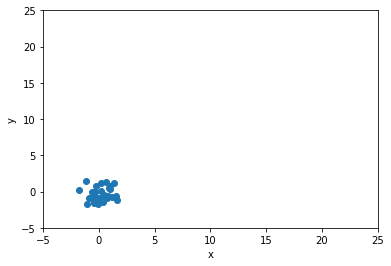

In [85]:
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import pylab as plt
%matplotlib inline

np.random.seed(100)

# data from qn 1
x = np.random.normal(0,1,30)
y = np.random.normal(0,1,30)

# let's take a look at the data
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-5,25)
plt.ylim(-5,25)
plt.scatter(x,y)

corr_pearson, p_pearson = pearsonr(x,y)
print('Pearson r correlation is {:.3f}'.format(corr_pearson))

So it appears from Pearson $r$ that the data is not correlated.

Pearson r correlation is 0.950


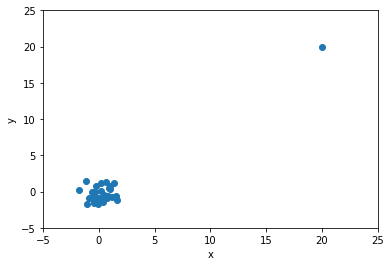

In [93]:
# now for qn 2
# let's add on that extra data point which we know is an outlier

new_x = np.append(x, [20])
new_y = np.append(y, [20])

# let's take a look at the data
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-5,25)
plt.ylim(-5,25)
plt.scatter(new_x,new_y)

corr_pearson, p_pearson = pearsonr(new_x,new_y)
print('Pearson r correlation is {:.3f}'.format(corr_pearson))

Now Pearson says we have strongly correlated data with correlation of 0.95!

Let's try Spearman now.

In [87]:
corr_spearman, p_spearman =  spearmanr(new_x,new_y)

print('Spearman rho correlation is {:.3f}'.format(corr_spearman)+' with p-value of {:.2f}'.format(p_spearman))

Spearman rho correlation is 0.220 with p-value of 0.23


Here we see that Spearman suggests there is no correlation (or rather it is very weak) in contrast to the extremely strong correlation value for Pearson’s correlation coefficient. This reminds us to **look at our data** before we try doing any fancy statistics on it!

### What do we mean by monotonic?

Monotonic relationships between data sets are where:
- one variable increases and the other increases or
- one variable decreases and the other decreases or
- one variable increases as the other decreases.

An example cartoon of monotonic, monotonic and linear, and non monotonic data is shown below (image from [here](https://www.statisticshowto.com/monotonic-relationship/)).

<img src="https://github.com/haleygomez/Data-Analysis-2021/raw/master/blended_exercises/Chapter%205/monotonic-relationship.png" width="400">

Monotonic variables can increase (or decrease) in the same direction, but not always at the same rate. But linear variables increase (or decrease) in the same direction *at the same rate*.

## Kendall's Tau

Unlike the Spearman $\rho$ statistic, Kendalls' $\tau$ test does not take into account the difference between ranked data — only the directional agreement. Therefore, this coefficient is more appropriate for *discrete data*. Kendall's $\tau$ coefficient is defined as:

${\tau ={\dfrac {({\text{number of concordant pairs}})-({\text{number of discordant pairs}})}{N(N-1)/2}}}$

- A concordant pair eg (x1, y1), (x2, y2) are pairs of values in which ranks coincide: $x1 < x2$ and $y1 < y2$ or $x1 > x2$ and $y1 > y2$. 

- A discordant pair would be one that does not satisfy this condition, eg ($x=1$,$y=7$) and ($x=2$,$y=5$) would be a discordant pair. 

Ties in $y$ are assumed to account equally as 0.5 to both the number of concordant pairs and the number of discordant pairs. Ties in $x$ are ignored. If $N$ is large the distribution is given by a normal distribution with mean $E[\tau_x] = 0$ and variance 

$\sigma^2 = \dfrac{\sqrt{2(2N+5)}}{3\sqrt(N(N-1))}.$

Note that the null hypothesis for Kendall $\tau$ would be that the variables are uncorrelated.

## Chi-square Test

The chi-square goodness-of-fit test (or $\chi^2$ test) can be applied to discrete distributions such as the binomial and the Poisson.

In this type of hypothesis test, we try to determine whether the data fit a particular distribution or not. For example, we may suspect the unknown data fit a binomial distribution and use a chi-square test (meaning the distribution for the hypothesis test is chi-square) to determine if there is a good match or not. 

This chi square statistic is obtained by calculating the difference between the observed number of cases and the expected number of cases in each category. This difference is squared and divided by the expected number of cases in that category to give the (general) chi-squared statistic:

$ \chi^2 = \sum_i^N \left( \dfrac{O_i - E_i}{\sigma_i}  \right)^2.$

We can compare the chi-squared statistic to probability tables using the number of degrees of freedom.  In general, the number of degrees of freedom if you write your data as a table is (number of rows-1) $\times$ (number of columns-1).

If $\chi^2 \leq n_{\rm bin}$ then we can say that there is a reasonable evidence that our assumption about the limiting function was correct. On the other hand, if $\chi^2 >> n_{\rm bin}$ then we might want to reconsider.

**Generalising chi-square**

In the above example, our expected difference between the observed values and expected values was given by $\sqrt{E_k}$. However, in general we can simply write wherever we are comparing the expected values (from say a model) with data values (measured in our experiment)

$\chi^2 = \sum_i^N \left( \dfrac{O_i - E_i}{\sigma_i}  \right)^2$

where $\sigma_i$ is the standard deviation expected for each point that is being compared to the underlying distribution.

#### Derivation: chi-square test

Suppose we wish to know the range of gun. We could perform an experiment where we fire $n$ projectiles from the gun, and measure the distance $x$ at which the projectiles first make contact with the ground. In such case, due to the many, random uncertainties, it is natural to assume that the distribution $x$ will be normally spread around some central value $x_0$, with a standard deviation of $\sigma$, such that the group of ranges $X = {x_1, x_2, \ldots, x_n} = N(x_0, \sigma)$

This is a new gun, and we know very little about it, so we have no prior knowledge of either $x_0$ or $\sigma$. Our first task is to estimate these from the measurements. We do this in the standard way, with,

$\mbox{best estimate for $x_0$} = \hat{x} = \dfrac{ \sum x_i } { n }$

and

$\mbox{best estimate for $\sigma$}  = \hat{\sigma} =  \sqrt{ \dfrac{ \sum (x_i - \hat x)^2 } { n -1 } }$


We now want know: is our assumption that the distances are normally distributed correct? To do this, we have to compare the expected distribution to our actual distribution, to see whether our values of $x$ are within those we expect for a limiting distribution of the form  $N(x_0, \sigma)$, which we are approximating with $N(\hat{x}, \hat{\sigma})$.

The first problem is that because $x$ is a continuous, rather than discrete variable, we need to split the distribution into intervals - remember that PDFs are not meaningful for a given $x$, but rather only make sense over some range of $x$. So let us split our data up into, say 4 bins, with boundaries chosen at $\hat{x} - \hat{\sigma}$, $\hat{x}$ and $\hat{x} + \hat{\sigma}$. We will refer to the number of bins as $n_{\rm bin}$

We can now bin our data, counting the number of measurements $O_k$ that we observe in each bin, $k$. We can then compare this number to the expected number of measurements we would have obtained in the bin, $E_k$, if our assumptions about the limiting distribution are true. To calculate $E_k$ for each bin, we simply work out the probability of obtaining an value in the range of $x$ covered by the bin, and multiply this by the total number of measurements made in the experiment,

$E_k = n \int_{x_{\rm min}}^{x_{\rm max}} N(\hat{x}, \hat{\sigma}) dx,$

where $x_{\rm min}$ and $x_{\rm max}$ are the lower and upper boundaries of bin $k$ respectively. Clearly, the expected number $E_k$ is only the number that we would expect in some average sense, and we do not expect any one experiment of finite $n$ to yield $O_k$ to be exactly $E_k$. However we do expect the deviations to be small, if our assumption about the underlying distribution is correct.

So how do we define small or large in this case? Well, the expected number of measurements in each bin can be thought of in terms of counting statistics -- i.e. the Poisson distribution that we encountered before. In this sense, $E_k$ represents the mean number that we would expect from many experiments (each taking exactly  $n$ measurements). We know that the standard deviation around this mean is given by simply $\sqrt{E_k}$.  So we would expect the deviations in our observed values from the expected values, i.e. $|O_k - E_k|$, to be close to the value  $\sqrt{E_k}$, if our assumptions about the underlying distribution are correct. 

That is, we expect,

$\dfrac{ |O_k - E_k| }{ \sqrt{E_k} } \sim 1$

If we sum up the deviations in all bins, we can define,

$\chi^2 = \sum_{k = 1}^{n_{bin}} \dfrac{ (O_k - E_k )^2}{ E_k }$

### Null hypothesis testing with chi-square

Let's say we measure a value of $\chi^2$ for our experiment.  How confident are we that we didn't just measure this statistic due to chance. 
Simply put, for the $\chi^2$-square test, we have the following:

- H0: The data are consistent with a specified distribution.	
- H1: The data are not consistent with a specified distribution

If the null hypothesis is true, the observed and expected values will be close in value and the $\chi$-square statistic will be close to zero. If the null hypothesis is false, then the $\chi$-square statistic will be large. 

So then we compare with the probability density function for $\chi^2$ and see if our $\chi^2$ value is greater than or less than some critical value that depends both on the significance probability we want to test against ($\alpha$, Chapter 4) and on the degrees of freedom $d$ - $\chi^2_{\alpha,{\rm d}}$.

The distribution of $\chi^2$ is shown below. 

<img src="https://github.com/haleygomez/Data-Analysis-2021/raw/master/blended_exercises/Chapter%205/deg_free_chi.png" width="400">

As $k \to \infty$, the expected value (mean) of this PDF tends to $k$ and $\sigma \to \sqrt{2k}$.  If $\chi^2_{\rm data}$ < $\chi^2_{\alpha,{\rm d}}$ then we can not reject our null hypothesis.

### The reduced chi-square statistic

Technically, one should compare the value of $\chi^2$ with the number of degrees of freedom $d$, rather than the number of bins. In general,

$d = n_{\rm data} - n_{\rm params}$

where $n_{\rm data}$ is the number of data points, and $n_{\rm params}$ is number of parameters that have needed to be computed from the data - also known as the *constraints*. Let's say we have three constraints: the total number of data points $n$ and then both the mean and variance were computed from the data. Now let's assume we ony have 4 bins of data, $n_{\rm data} = 4$. So we see that $d = 1$ for this example. Had we had fewer bins, the $\chi^2$ test is basically not appropriate to use.

This suggests that a more convenient way to think about $\chi^2$ is via the reduced $\chi^2$, or $\chi^2$ per degree of freedom, which we will denote as $\tilde{\chi}^2$, and define via

$\tilde{\chi}^2 = \dfrac{ \chi^2 }{ d }$

We then see that for the case where our assumptions about the underlying distribution are correct,

$\mbox{expected value of } \tilde{\chi}^2 \approx 1$.

However, recent work by [Andrae et al (2010)](https://arxiv.org/pdf/1012.3754.pdf) show that in practice, the degrees of freedom are in fact somewhere between $n_{\rm data}-n_{\rm params}$ and $n_{\rm data}-1$, where it is $n_{\rm data}-n_{\rm params}$ only if the model we are comparing data to is *linear* and *linearly independent* for the
given data.

## KS Test

The Kolmogorov-Smirnov, or K-S test, is one of the most commonly used tests in data analysis. The K-S  is used to test whether two sets of data are drawn from the same underlying limiting distribution. It is based around the *cumulative distribution* of the data, and is restricted to continuous variables.   This is a very common test in astronomy and medical science. 

When would we use it? Let's assume that Group A take a placebo drug and Group B have medicine. Does the medicine have any effect?  We can compare the distribution of results from Group A and B to see if they are different. 

However, even if the medicine doesn’t work, these numbers will never be the same due to randomness in experimental data, so *how different* must the outcomes be to say there is a difference or not in the medicine and the placebo?

The cumulative distribution $S_N(x)$ of a set of $N$ data points $\{ x_1, x2, \ldots, x_N \}$ is the fraction of data points with values less than a given $x$.  The function is created by simply sorting the data and making a running, normalised, sum for each value of $x$. Clearly the function moves in steps of $1/N$, being constant between consecutive values of $x$.

The K-S test then measures the *maximum distance* between two cumulative distributions. If one is comparing the data set to some limiting distribution $f(x)$, with corresponding cumulative function $F(x)$, then the distance $D$ between the two cumulative distributions is simply,

$D = \underset{-\infty < x < \infty}{\text{max}} |S_N(x) - F(x)|$

or in the case where one is comparing two data sets,

$D = \underset{-\infty < x < \infty}{\text{max}} |S_{N_1}(x) - S_{N_2}(x)|$

where $S_{N_1}(x)$  and  $S_{N_2}(x)$ are the two data sets. One nice feature of using the distance in this way is that the K-S invariant to expansions and contractions in $x$ -- it works just the same for $x$ and $\rm {log}(x)$.

The null hypothesis in this case is that **the two distributions are the same**. So to put it more simply, the KS test uses the maximum deviation $D$ between two distributions as a figure of merit to decide whether they match each other.  Then we would infer that the closer the KS $D$ statistic value is to zero, then it is more probable that 2 samples came from the same distribution.  The closer $D$ gets to 1 suggests that the 2 samples did not compe from the same underlying distribution, ie we could infer that they are statistically different from each other. 

**Disadvantages of the KS test**

- The test is not distribution free, and so the data cannot be used to provide the parameters for the model $f(x)$, against which it is to be tested. For example, you cannot use the the K-S test to check whether the data has been drawn from a Gaussian, for which the mean and variance was derived from the data - the model parameters need to be known in advance.

- Although it has been used to examine multivariate distributions, this is generally not a good idea, due to the difficulties of defining cumulative functions in multivariate space.

- Finally, and probably most importantly, the KS is not good at picking up differences in the tails of functions. This is because the cumulative functions, which form the basis of the test, tend to 0 and 1 by definition. This results in the KS test being most sensitive around the median of the distributions (the 50th percentile), and progressively less sensitive as we move to the extremes.

### <font color=#4290C4>Example</font>

Data for recovery times (in mins) after a heart attack for a group of patients given a placebo and a group given a medicine are measured to be:

`placebo_B=[1.26, 0.34, 0.70, 1.75, 50.57, 1.55, 0.08, 0.42, 0.50, 3.20, 0.15, 0.49, 0.95, 0.24, 1.37, 0.17, 6.98, 0.10, 0.94, 0.38]`

`treatment_B=  [2.37, 2.16, 14.82, 1.73, 41.04, 0.23, 1.32, 2.91, 39.41, 0.11, 27.44, 4.51, 0.51, 4.50, 0.18, 14.68, 4.66, 1.30, 2.06, 1.19]`

Find the expected value and associated statistics for this data.

###  <font color=#c38241> Solution</font>

Click below to see the solution.

In [94]:
import numpy as np

treatment_B=[1.26, 0.34, 0.70, 1.75, 50.57, 1.55, 0.08, 0.42, \
           0.50, 3.20, 0.15, 0.49, 0.95, 0.24, 1.37, 0.17, 6.98, 0.10, 0.94, 0.38]

placebo_B=  [2.37, 2.16, 14.82, 1.73, 41.04, 0.23, 1.32, 2.91, \
               39.41, 0.11, 27.44, 4.51, 0.51, 4.50, 0.18, 14.68, 4.66, 1.30, 2.06, 1.19]

mean_placebo = np.mean(placebo_B)
std_placebo = np.std(placebo_B,ddof=1)

mean_treatment = np.mean(treatment_B)
std_treatment = np.std(treatment_B,ddof=1)

print('The Placebo group')
print('The average recovery time is {:.2f} +/- {:.2f} mins'.format(mean_placebo,std_placebo))
print('min and max recovery times are {:.2f} and {:.2f} mins'\
      .format(np.min(placebo_B),np.max(placebo_B)))

print()
print()

print('The Medicine group')
print('The average recovery time is {:.2f} +/- {:.2f} mins'.format(mean_treatment,std_treatment))
print('min and max recovery times are {:.2f} and {:.2f} mins'.\
      format(np.min(treatment_B),np.max(treatment_B)))

The Placebo group
The average recovery time is 8.36 +/- 12.82 mins
min and max recovery times are 0.11 and 41.04 mins


The Medicine group
The average recovery time is 3.61 +/- 11.16 mins
min and max recovery times are 0.08 and 50.57 mins


So from these simple stats it appears that the recovery time is on average faster with the medicine compared to the treatment.

### <font color=#4290C4>Example</font>

Plot the cumulative distributions of these two groups.

###  <font color=#c38241> Solution</font>

Click below to see the solution.

Let's look at how the data is distributed by first sorting it.  To make a cumulative distribution from discrete data, all we need to do is sort the data and sum it at each step.

Text(0.5, 0, 'recovery time')

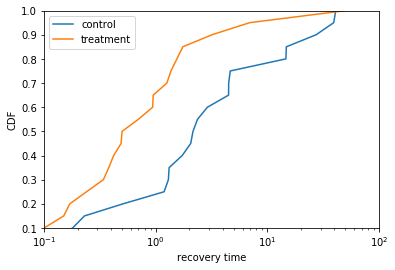

In [95]:
#make a function to plot the cumulative distribution function for the sample
def cdf(x):
    xs = np.sort(x)
    # this basically makes a cumulative distribution function
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

p_t,p_cdf = cdf(placebo_B)
t_t,t_cdf = cdf(treatment_B)

plt.semilogx(p_t,p_cdf,label='control')
plt.semilogx(t_t,t_cdf,label='treatment')

plt.xlim(0.1,100)
plt.ylim(0.1,1)
plt.legend()
plt.ylabel('CDF')
plt.xlabel('recovery time')



But for most of the $x$ values, the fraction of the group given medicine that is less than x is clearly less than the fraction of the placebo group that is less than $x$.  That is, by-and-large, the group with the medicine have shoter recovery times than the control/placebo values for the same cumulative fraction. 

For example, the median (cumulative fraction = 0.5) recovery time for the treatment group is clearly less than one minute whereas the median for the placebo is more than 1min.

### <font color=#4290C4>Example</font>

Use the KS test to decide if these distributions are significantly different. You may use inbuilt functions.

###  <font color=#c38241> Solution</font>

Click below to see the solution.

In [90]:
from scipy.stats import ks_2samp
results = ks_2samp(treatment_B,placebo_B)

print('D is {:.3f}'.format(results[0]))
print('The p value is {:.4f}'.format(results[1]))

D is 0.450
The p value is 0.0335


The $p$-value is below our significance level of 0.05 so we can reject the null hypothesis that the two samples are the same. 

### <font color=#4290C4>Example</font>

Above we saw the KS test being applied to two different samples. Here we will compares a data sample with a distribution. 

We measure the current running through a circuit over a period of 8 hours. Each hour, we record the following currents (in amps)

1.41, 0.26, 1.97, 0.33, 0.55, 0.77, 1.46, 1.18

Is there any evidence that the current is drawn from a uniform distribution between 0 and 2 amps?

###  <font color=#c38241> Solution</font>

Click below to see the solution.

The probability density function of a uniform random variable $X$ between 0 and 2 is $f(x)=0.5$ for $0 < x < 2$. Therefore, the probability that $X$ is less than or equal to x is:

$P(X \le x)= \int^x_0 \dfrac{1}{2}dt=\dfrac{1}{2}x$

We are interested in testing:

the null hypothesis $H_0:$  

$F(x)=F_0(x)$ 

against the alternative hypothesis $H_1:

$F(x) \neq F_0(x).$

Let's compare the cumulative distributions for the current data and a randomly generated uniform distribution from $0 < x < 2$.

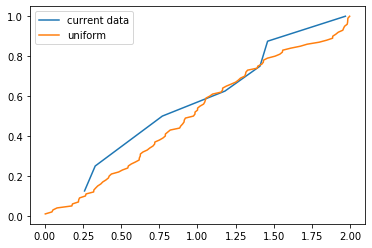

In [91]:
import numpy as np
import pylab as plt

%matplotlib inline

#make a function to plot the cdf for the sample
def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

# generate random uniform distribution
s = np.random.uniform(0,2,100)

# you could also use the following that automatically calculates the function
# from statsmodels.distributions.empirical_distribution import ECDF

current = [1.41, 0.26, 1.97, 0.33, 0.55, 0.77, 1.46, 1.18]

xs, ys = ecdf(current)
xss, yss = ecdf(s)
plt.plot(xs, ys, label="current data", markerfacecolor='none')
plt.plot(xss, yss, label="uniform", markerfacecolor='none')
plt.legend(loc='upper left')

We can also use scipy.stats inbuilt `KS` routine and tell it we are comparing data to a uniform distribution.

In [92]:
# import package
from scipy.stats import kstest
import numpy as np
import pylab as plt

%matplotlib inline

current = [1.41, 0.26, 1.97, 0.33, 0.55, 0.77, 1.46, 1.18]

# run test of data against a uniform distribution
# ks test outputs the $D$ statistic and a $p value$.

kstest(current,'uniform',args=[0,2])

KstestResult(statistic=0.14500000000000002, pvalue=0.9960120762325497)

The function returns $D$, the maximum difference between the cumulative distribution (CDF) of the input data and the model (the uniform distribution). The second is the $p$-value, meaning the probability that if the data had actually been drawn from the proposed CDF, the resulting value of $D$ would have been as large or larger than the one we measured.

This value of $p$ tells us that 99.6% of the time, we would expect a value of D as large as the one measured even if the data had been drawn from the uniform sample.   Thus we *can not reject the null hypothesis that the measured currents are drawn from a uniform distribution*.

### Derivation: KS test

To derive the KS test involves modelling the random walk of data, analogous to Brownian motion. The function that models this is given by

$K(\lambda) = 2 \sum_{j = 1}^{\infty} (-1)\,^{j - 1}\, e^{-2j^2\lambda^2}$

The significance level of an observed value of $D$ is given approximately by,

$\text{Prob}\,(D > \text{observed}) = K \left( \left[ \sqrt{N_e} + 0.12 + 0.11/\sqrt{N_e} \right] D \right)$

where $N_e$ is the effective number of data points: $N_e = N$ for the case where we have a single set of data points, but for two distributions this is given by

$N_e = \dfrac{ N_1 N_2 }{ N_1 +  N_2 }$

### Anderson Darling

This is an improvement on the problems of the K-S test in the tails of the distributions. The Anderson-Darling test weights the data points away from the median. The statistic is given by:

$A^2_{AD, N} = N \sum_{i = 1}^{N} \dfrac{ [i / N - S_N(x_i)]^2 }{S_N(x_i) (1 - S_N(x_i))  }$

which should be computed for *both* the observed data set and the null distribution. There is unfortunately no analytic form for the A-D test, and one instead needs to resort to numerical computation: one simply creates a suite of random draws of $N$  points from the null distribution to build up a pdf of $A^2_{AD, N}$. The observed value of $A^2_{AD, N}$ from the data set can then be compared to the probability of drawing the same value from the null, to decide wether to retain or reject the null hypothesis that the distributions are the same.

***

Now you are ready to tackle the **Chapter 5 quiz** on Learning Central and the [Chapter 5 yourturn notebook](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter%205/Chapter5_yourturn.ipynb).